In [1]:
import pandas as pd
import numpy as np
import os
import json

In [2]:
def EMA(prices, alpha):
    ema = prices[0]
    for x in prices[1:]:
        ema = alpha*x + (1-alpha)* ema
    return ema

def create_baseline(data):

    pred_reg = []
    pred_classif = []

    for data_dict in data:
        stock_series = data_dict['stock']
        EMA_returns = EMA(stock_series, 2/(len(stock_series)+1))
        classif_target = 1 if stock_series[-1] > EMA_returns else 0
        pred_classif.append(classif_target)
        pred_reg.append(stock_series[-1])
    
    return pred_reg, pred_classif

In [3]:
datapath = 'data/'
split = 'dev'
savepath = 'res/answer/'
index = 'all'
# You can also give the name of the index: "VIX_1w" ou "EURUSDV1M_1w"
if not os.path.exists(savepath):
        os.mkdir(savepath)

if index =='all':
    indexes = [index.split('.')[0] for index in os.listdir(f'{datapath}/{split}')]
else:
    indexes = [index]

for index in indexes:
    save_path = os.path.join(savepath, index)
    if not os.path.exists(save_path):
        os.mkdir(save_path)

    with open(f'{datapath}/{split}/{index}.json', 'r') as fp:
        data = json.load(fp)
    pred_reg, pred_classif = create_baseline(data)

    with open(os.path.join(save_path, 'pred_reg.txt'),'w') as f:
        f.write('\n'.join(list(map(str, pred_reg))))

    with open(os.path.join(save_path, 'pred_classif.txt'),'w') as f:
        f.write('\n'.join(list(map(str, pred_classif))))


In [9]:
len(data[0]['stock'])

20

In [3]:
datapath = 'data/'
train_split = 'train'
index = 'EURUSDV1M_1w'

with open(f'{datapath}/{train_split}/{index}.json', 'r') as fp:
        data = json.load(fp)

In [47]:
data[0]['speech'][5]['ECB'][0]

' It is a pleasure to be here this afternoon to give the closing address at this very timely conference on executive compensation. Executive compensation has for some time been an important part of academic and policy discussions of corporate law and governance. The public\'s attention to the subject has periodically increased. Such heightened interest is not often part of corporate governance debates, but rather in response to high compensation levels for certain executives, or the contrast between rising executive compensation and sluggish overall wage growth. I think it fair to say, however, that public scrutiny has never been more intense than in the past year. And never has it been more concentrated on a particular industry than in the current focus on large financial services firms. The interest and role of the Federal Reserve is both broader and more targeted than the issue of executive compensation as such. It is more targeted in that our concern with compensation matters rests

## Statistical Analyse for Speech Text

1. number of words per sentence.

2. number of words per paragraphs.

3. number of words per speech.

4. number of sentences per paragraph.

5. number of sentences per speech.

6. number of paragraphs per speech.

In [33]:
ECB = set()
FED = set()
cnt_ECB = 0
cnt_FED = 0

for data_dict in data:
    for s in data_dict['speech']:
        if s['ECB']:
            cnt_ECB += 1
            ECB.add(s['ECB'][0])
        if s['FED']:
            cnt_FED += 1 
            FED.add(s['FED'][0])
        
        



In [34]:
print(len(ECB))
print(len(FED))
print(cnt_ECB)
print(cnt_FED)

1262
417
9487
3303


In [48]:
nWordSen = [] # number of words per sentence.
nWordPara = [] # number of words per paragraphs.
nWordSpch = [] # number of words per speech.
nSenPara = [] # number of sentences per paragraph.
nSenSpch = [] # number of sentences per speech.
nParaSpch = [] # number of paragraphs per speech.

for s in ECB:
    nSenSpch.append(0)
    nWordSpch.append(0)
    para = s.split('\\.')
    nParaSpch.append(len(para))
    
    for p in para:
        nWordPara.append(0)

        sents = p.split('.')
        tmp = len(sents)
        nSenSpch[-1] += tmp
        nSenPara.append(tmp)
        
        for st in sents:
            st_s = st.strip()
            words = st_s.split(' ')
            tmp = len(words)
            nWordSen.append(tmp)
            nWordPara[-1] += tmp
            nWordSpch[-1] += tmp
            

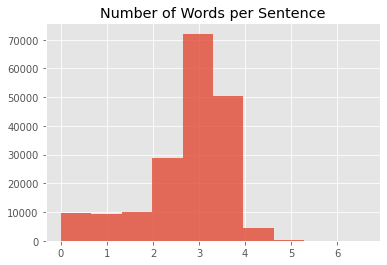

In [59]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.hist(np.log(nWordSen), histtype='barstacked', alpha=0.8)
plt.title('Number of Words per Sentence')
plt.show()
    

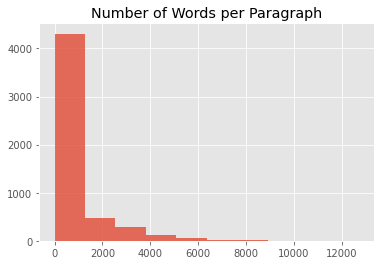

In [64]:
plt.hist(nWordPara, alpha=0.8)
plt.title('Number of Words per Paragraph')
plt.show()

In [68]:
print(sum([i > 4096 for i in nWordPara]))
print(len(nWordPara))

169
5273


In [69]:
print(sum([i > 4096 for i in nWordSpch]))
print(len(nWordSpch))

298
1262


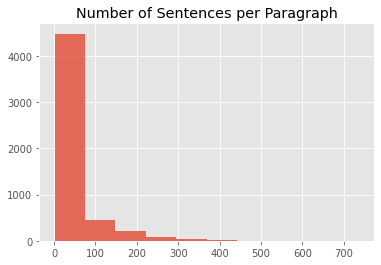

In [63]:
plt.hist(nSenPara, alpha=0.8)
plt.title('Number of Sentences per Paragraph')
plt.show()

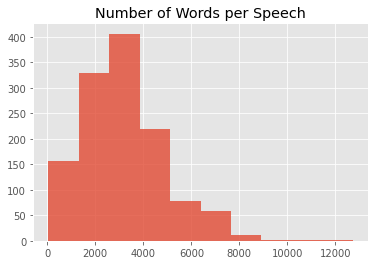

In [65]:
plt.hist(nWordSpch, alpha=0.8)
plt.title('Number of Words per Speech')
plt.show()

## Pretrained Encoder

In [1]:
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained("bert-base-uncased")
text = "Replace me by any text you'd like."
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)

Downloading:   1%|          | 3.55M/420M [00:06<10:09, 716kB/s]

KeyboardInterrupt: 

## Summarization

In [5]:
from summarizer import Summarizer,TransformerSummarizer

AttributeError: module 'cymem.cymem' has no attribute 'PyMalloc'

In [2]:
from transformers import PegasusTokenizer, PegasusForConditionalGeneration

# Let's load the model and the tokenizer 
model_name = "human-centered-summarization/financial-summarization-pegasus"
tokenizer = PegasusTokenizer.from_pretrained(model_name)


In [3]:
model = PegasusForConditionalGeneration.from_pretrained(model_name)

Downloading:   1%|          | 3.59M/420M [00:20<10:09, 716kB/s]

In [4]:
# Some text to summarize here
text_to_summarize = "National Commercial Bank (NCB), Saudi Arabia’s largest lender by assets, agreed to buy rival Samba Financial Group for $15 billion in the biggest banking takeover this year.NCB will pay 28.45 riyals ($7.58) for each Samba share, according to a statement on Sunday, valuing it at about 55.7 billion riyals. NCB will offer 0.739 new shares for each Samba share, at the lower end of the 0.736-0.787 ratio the banks set when they signed an initial framework agreement in June.The offer is a 3.5% premium to Samba’s Oct. 8 closing price of 27.50 riyals and about 24% higher than the level the shares traded at before the talks were made public. Bloomberg News first reported the merger discussions.The new bank will have total assets of more than $220 billion, creating the Gulf region’s third-largest lender. The entity’s $46 billion market capitalization nearly matches that of Qatar National Bank QPSC, which is still the Middle East’s biggest lender with about $268 billion of assets."

# Tokenize our text
# If you want to run the code in Tensorflow, please remember to return the particular tensors as simply as using return_tensors = 'tf'
input_ids = tokenizer(text_to_summarize, return_tensors="pt").input_ids

# Generate the output (Here, we use beam search but you can also use any other strategy you like)
output = model.generate(
    input_ids, 
    max_length=32, 
    num_beams=5, 
    early_stopping=True
)

# Finally, we can print the generated summary
print(tokenizer.decode(output[0], skip_special_tokens=True))

Saudi bank to pay a 3.5% premium to Samba share price. Gulf region’s third-largest lender will have total assets of $220 billion


In [8]:
output

tensor([[    0,  6794,  1679,   112,   626,   114, 52700,  2572,   112, 43311,
           537,   469,   107,  7175,  1322,   123,   116,   776,   121, 22504,
          7670,   138,   133,   916,  2718,   113, 80233,  1722,     1]])

## Summarization for all the speeches

In [1]:
from summarizer import Summarizer,TransformerSummarizer

In [2]:
GPT2_model = TransformerSummarizer(transformer_type="GPT2",transformer_model_key="gpt2-medium")

Downloading: 100%|██████████| 1.42G/1.42G [55:48<00:00, 454kB/s]    
Downloading: 100%|██████████| 0.99M/0.99M [00:02<00:00, 376kB/s]
Downloading: 100%|██████████| 446k/446k [00:01<00:00, 327kB/s]  
Downloading: 100%|██████████| 1.29M/1.29M [00:03<00:00, 391kB/s]


In [4]:
import json
datapath = 'data/'
train_split = 'train'
index = 'EURUSDV1M_1w'

with open(f'{datapath}/{train_split}/{index}.json', 'r') as fp:
        data = json.load(fp)

In [21]:
def get_unique_list(data):
    ECB = set()
    FED = set()

    for data_dict in data:
        for s in data_dict['speech']:
            if s['ECB']:
                ECB.add(s['ECB'][0])
            if s['FED']:
                FED.add(s['FED'][0])
    
    ECB = list(ECB)
    FED = list(FED)
    return ECB, FED

In [6]:
lt = get_unique_list(data, 'FED')
print(type(lt[0]))

<class 'str'>


In [14]:
new = GPT2_model(lt[0], min_length=60, num_sentences=5)
new

'The ECB’s recent monetary policy measures: Effectiveness and challenges   Camdessus lecture by Mario Draghi, President of the ECB, IMF, Washington, DC, 14 May 2015 Ladies and gentlemen, Over the past year the ECB has taken a series of major monetary policy measures, culminating in our decision in January this year to expand our asset purchases towards public sector securities. And this may indeed have come as a surprise to some observers: one of the key objections to our programme was that it would be ineffective in a low interest rate environment and/or following a balance sheet recession. We cannot shy away from implementing a policy that ensures price stability on account of potential collateral effects. Similarly, the debt burden of households and firms has fallen and reduced bank funding costs have contributed positively to retained\xa0earnings, which accelerates the deleveraging of bank balance sheets. See Homar, Timotej and Sweder van Wijnbergen (2014), “On Zombie Banks and Rec

In [16]:
len(new.split())

169

In [22]:
import copy
from tqdm import tqdm

def summarization(data):
    ECB, FED = get_unique_list(data)
    summary_ECB = []
    summary_FED = []
     
    for speech in tqdm(ECB):
        summary = GPT2_model(speech, min_length=60, num_sentences=5)
        summary_ECB.append(summary)
    print("Finished summarizing the ECB list!")

    for speech in tqdm(FED):
        summary = GPT2_model(speech, min_length=60, num_sentences=5)
        summary_FED.append(summary)
    print("Finished summarizing the FED list!")

    summary_data = copy.deepcopy(data)
    for data_dict, new_dict in zip(data, summary_data):
        for s, sm in zip(data_dict['speech'], new_dict['speech']):
            if s['ECB']:
                id = ECB.index(s['ECB'][0])
                new_sum = summary_ECB[id]
                sm['ECB'] = [new_sum]
            if s['FED']:
                id = FED.index(s['FED'][0])
                new_sum = summary_FED[id]
                sm['FED'] = [new_sum]
    
    return summary_data



    

In [23]:
summary_data = summarization(data)

  5%|▍         | 57/1262 [48:52<17:13:23, 51.46s/it]


KeyboardInterrupt: 

In [51]:
data[0]['speech'][-1]['FED']

['  A case for rapid euro adoption?   Introduction for panel discussion, by Gertrude Tumpel-Gugerell, Member of the Executive Board of the ECB, OeNB Conference on European Economic Integration, on ‘The Euro’s Contribution to Economic Stability in CESEE’, Vienna, 16 November 2009 Ladies and gentlemen, [1]  It is a pleasure to be at this conference among such distinguished panellists to speak about the European economic integration and the adoption of the euro. For us at the ECB, the topic of the optimal timing of euro adoption for the EU countries in Central and Eastern Europe (CEE) that have not yet done so is very important. According to the Maastricht Treaty, all EU countries are called upon adopting the euro at some stage. So it’s not a question of if, but rather on when to join.  However, to ensure that the monetary union is working smoothly, it is essential – and the Maastricht Treaty has foreseen this - that the countries joining the euro area have achieved a sufficient degree of

In [52]:
summary_data[0]['speech'][-1]['FED']

[' ']

## After Summarization

In [31]:
with open('summary_text.json', 'r') as fp:
        data_sum = json.load(fp)

In [32]:
data_sum = json.loads(data_sum)

In [33]:
data_sum[0]

{'speech': [{'ECB': [], 'FED': []},
  {'ECB': [], 'FED': []},
  {'ECB': [], 'FED': []},
  {'ECB': [], 'FED': []},
  {'ECB': [], 'FED': []},
  {'ECB': ['While we may well make changes in some aspects of the guidance based on comments we receive, it is critical that the incentives created by compensation arrangements be reviewed and adjusted to ensure the safe and sound operation of financial firms. We will have to build on the principles we have set forth and we may, over time, identify standards that should be universally applied to certain classes of employees. We will also have an ongoing coordination process for developing and clarifying guidance for the non-LCBO institutions. This concern exists at the international, as well as national, level, which is one of the reasons why the Financial Stability Board has devoted so much attention to the issue in the past year. There is thus significant overlap between the interests of shareholders and of supervisors in the area of employee com